In [295]:
#coding=utf-8
import  xml.dom.minidom
#打开xml文档
dom = xml.dom.minidom.parse('E:\_\第十一批\HX1-Or_GRAS_MEPA-HP_SCI_N_20220401045756_20220401120231_01044_B.2BL')

#得到文档元素对象
root = dom.documentElement
print (root)
print (root.nodeName)
print (root.nodeValue)
print (root.nodeType)
print (root.ELEMENT_NODE)

bb = root.getElementsByTagName('File_Area_Observational')
print (bb[0].nodeName)

bb = root.getElementsByTagName('File_Area_Observational')
print (bb[0].nodeName)

<DOM Element: Product_Observational at 0x1bea4f73790>
Product_Observational
None
1
1
File_Area_Observational
File_Area_Observational


In [296]:
#coding=utf-8
import xml.etree.ElementTree as ET
def read_2BL(file):
    #prese()解析xml文件
    tree=ET.parse(file)
    root=tree.getroot()
    namespace="{http://pds.nasa.gov/pds4/pds/v1}"

    File_Area_Observational=root.find(namespace+"File_Area_Observational")

    Table_Character=File_Area_Observational.find(namespace+"Table_Character")

    Record_Character=Table_Character.find(namespace+"Record_Character")

    for child in Record_Character:
        if child.tag==namespace+"Group_Field_Character" :
            name=child.find(namespace+"name")
            if name.text=="e/p/he_Science_Data" :
                group_location=child.find(namespace+"group_location").text
                group_length=child.find(namespace+"group_length").text
                repetitions=child.find(namespace+"repetitions").text
                return(int( group_length), int (group_location), int( repetitions))
                break
            # if name.text=="e/p/he_Trigger_Count" :
            #     group_location=child.find(namespace+"field_location").text
            #     group_length=child.find(namespace+"field_length").text
            #     repetitions=child.find(namespace+"repetitions").text
            #     return(int( field_length), int (field_location), int( repetitions))
            #     break




In [297]:
import os
from unittest import result
def findfiles(path, part_filename, model):
    count = 1
    result=[]
    for root, dirs, files in os.walk(path):
        for filename in files:
            if part_filename in filename and model in filename:
                result.append(root + "/" + filename[:-4])
                count += 1
    
    
    return(result)


In [298]:
import numpy as np

year=2022
months=[3,4]
days_of_month={2:range(10,30),3:range(25,32), 4:range(1,16)}
#days_of_month={3:[25], 4:[1]}
filename_dic={}

part_filenames=[]
for month in months:
    for day in days_of_month[month]:
        part_filename="N_%4i%s%s"%(year,str(month).rjust(2,'0'), str(day).rjust(2,'0'))
        part_filenames.append(part_filename)
        filenames=findfiles("E:\_", part_filename, ".2BL")
        filename_dic[part_filename]= filenames
        
        print (filenames)



['E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220325030646_20220325050718_01020_B', 'E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220325103344_20220325171556_01021_B', 'E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220325171600_20220326002035_01022_B']
['E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220326002039_20220326022115_01023_B', 'E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220326102844_20220326142952_01024_B', 'E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220326142956_20220326213431_01025_B', 'E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220326213431_20220326233515_01026_B']
['E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220327050343_20220327114347_01027_B', 'E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220327114347_20220327184822_01028_B', 'E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220327184826_20220328015301_01029_B']
['E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220328015305_20220328085741_01030_B', 'E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220328085741_20220328160216_01031_B', 'E:\\_\\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220328160220_2022032

In [299]:
from tokenize import group


energysall=[]
timesall = []
flagall =[]
lightcountall = []
totalcountall = []
countall =[]
lonlatalt = []
lightevent = []
for month in months:
    for day in days_of_month[month]:
        part_filename = "N_%4i%s%s"%(year,str(month).rjust(2,'0'), str(day).rjust(2,'0'))
        for filename in filename_dic[part_filename]:
            group_length, group_location, repetitions=read_2BL(filename+".2BL")
            print (filename, group_length, group_location)
            # group_length=5
            # group_location=2944
            # repetitions=1
            time_location=1
            time_length=27

            flag_location=29
            flag_length=1

            totalcount_location=2937
            lightcount_length=6

            penetrationcount_location=2956
            penetrationcount_length=5

            lonlatalt_location = 2966
            lonlatalt_length = (12+1)*3

            ratio_location=2962
            ratio_length = 3

            lightevent_location=2307
            lightevent_length = 3

            fileHandler = open(filename+".2B","r")
            line = fileHandler.readline()
            energysfile = []
            timesfile = []
            flagfile = []
            lightcountfile = []
            totalcountfile = []
            countfile = []
            lonlataltfile =[]
            lighteventfile =[]

            count=0
            while line:
                count+=1
                energysline =np.array( [float(x) for x in line[group_location-1: group_location-1+group_length].split()] ).reshape(repetitions, 3)
                energysfile.append(energysline)

                timesline =line[time_location-1: time_location-1+time_length]
                timesfile.append(timesline)

                flagfile.append(int(line[flag_location-1: flag_location-1+flag_length]))

                lighteventfile.append(int(line[lightevent_location-1: lightevent_location-1+lightevent_length]))

                countfile.append(np.array([float(x) for x in line[totalcount_location-1: penetrationcount_location-1+penetrationcount_length].split()]))
                
                lonlataltfile.append(np.array([float(x) for x in line[lonlatalt_location-1: lonlatalt_location-1+lonlatalt_length].split()]))
                
                # totalcountfile.append(float(line[totalcount_location-1: totalcount_location-1+totalcount_length]))
                # lightcountfile.append(float(line[lightcount_location-1: lightcount_location-1+lightcount_length]))

                line = fileHandler.readline()
                #energysline = np.array([float(x) for x in line[group_location-1: group_location-1+group_length].split()]).reshape(repetitions, 3)
            #print (energysfile)
            print(np.array(energysfile).shape,count) 
            energysall.append(np.array(energysfile))
            timesall.append(np.array(timesfile))
            flagall.append(np.array(flagfile))
            # totalcountall.append(np.array(totalcountfile))
            # lightcountall.append(np.array(lightcountfile))
            countall.append(np.array(countfile))
            lonlatalt.append(np.array(lonlataltfile))
            lightevent.append(np.array(lighteventfile))

energysall_np=np.concatenate(energysall)
timesall_np=np.concatenate(timesall)
flagall_np = np.concatenate(flagall)
# totalcountall_np=np.concatenate(totalcountall)
# lightcountall_np=np.concatenate(lightcountall)
# totalcountall_np=np.concatenate(totalcountall)
# lightcountall_np=np.concatenate(lightcountall)
countall_np=np.concatenate(countall)
lonlatalt_np=np.concatenate(lonlatalt)
lightevent_np=np.concatenate(lightevent)
print(np.concatenate(energysall).shape)          
#with  open("E:\_\第十一批\HX1-Or_GRAS_MEPA-HP_SCI_N_20220401045756_20220401120231_01044_B.2B",  "r")  as  fileHandler:


E:\_\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220325030646_20220325050718_01020_B 594 2315
(1809, 22, 3) 1809
E:\_\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220325103344_20220325171556_01021_B 594 2315
(5788, 22, 3) 5788
E:\_\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220325171600_20220326002035_01022_B 594 2315
(6364, 22, 3) 6364
E:\_\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220326002039_20220326022115_01023_B 594 2315
(1810, 22, 3) 1810
E:\_\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220326102844_20220326142952_01024_B 594 2315
(3372, 22, 3) 3372
E:\_\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220326142956_20220326213431_01025_B 594 2315
(6364, 22, 3) 6364
E:\_\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220326213431_20220326233515_01026_B 594 2315
(1812, 22, 3) 1812
E:\_\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220327050343_20220327114347_01027_B 594 2315
(5755, 22, 3) 5755
E:\_\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220327114347_20220327184822_01028_B 594 2315
(6367, 22, 3) 6367
E:\_\第十批/HX1-Or_GRAS_MEPA-HP_SCI_N_20220327184826_20220328015301_01029_B 594 2315
(6370, 22

In [300]:
import time
import datetime as dt
def str2time(string):
    struct_time= time.strptime(string,"%Y-%m-%dT%H:%M:%S.%fZ")
    #print (struct_time)
    string_time= time.strftime("%Y-%m-%d %H:%M:%S", struct_time)
    return (dt.datetime.strptime(string_time, '%Y-%m-%d %H:%M:%S') )
def str2time_num(string):
    struct_time= time.strptime(string,"%Y-%m-%dT%H:%M:%S.%fZ")
    #print (struct_time)
    string_time= time.strftime("%Y-%m-%d %H:%M:%S", struct_time)
    return (time.mktime( struct_time))

In [301]:
timesall_num=[str2time_num(x) for x in timesall_np]

In [302]:
print(np.array( timesall_num).shape)

(452357,)


In [303]:
timesall_st=[str2time(x) for x in timesall_np]

In [304]:
#dt=timesall_st[1:]-timesall_st[:-1]
for i, t in enumerate(timesall_st):

    if i>0:
        if (timesall_st[i]- timesall_st[i-1]!=dt.timedelta(seconds=4)):
            print(timesall_st[i], timesall_st[i-1])
print (timesall_st[0], timesall_st[-1], timesall_st[-1]-timesall_st[0], timesall_np.size)

2022-03-25 10:33:44 2022-03-25 05:07:18
2022-03-25 10:50:28 2022-03-25 10:34:00
2022-03-25 18:19:19 2022-03-25 18:19:16
2022-03-25 18:19:52 2022-03-25 18:19:47
2022-03-25 18:20:03 2022-03-25 18:20:00
2022-03-25 19:59:03 2022-03-25 19:58:39
2022-03-25 20:54:39 2022-03-25 20:54:31
2022-03-26 10:28:44 2022-03-26 02:21:15
2022-03-26 10:45:28 2022-03-26 10:29:00
2022-03-26 14:31:43 2022-03-26 14:31:40
2022-03-26 14:31:56 2022-03-26 14:31:51
2022-03-26 14:32:07 2022-03-26 14:32:04
2022-03-26 17:12:59 2022-03-26 17:12:31
2022-03-26 21:34:31 2022-03-26 21:34:31
2022-03-27 05:03:43 2022-03-26 23:35:15
2022-03-27 05:20:27 2022-03-27 05:03:59
2022-03-27 08:49:35 2022-03-27 08:49:27
2022-03-27 11:43:47 2022-03-27 11:43:47
2022-03-27 12:27:58 2022-03-27 12:27:55
2022-03-27 14:26:54 2022-03-27 14:26:42
2022-03-27 15:22:06 2022-03-27 15:21:58
2022-03-27 22:53:33 2022-03-27 22:53:30
2022-03-27 22:58:54 2022-03-27 22:58:49
2022-03-27 23:10:05 2022-03-27 23:10:02
2022-03-28 08:57:41 2022-03-28 08:57:41


(452357, 4)


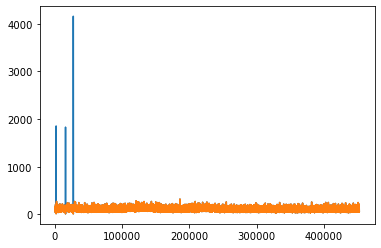

In [320]:
import matplotlib.pyplot as plt
print(countall_np.shape)
totalcountall_np =countall_np[:,0]
totalcountall_npnan=totalcountall_np*1
totalcountall_npnan[np.where(totalcountall_np>350)]=np.nan
plt.plot(totalcountall_np)
plt.plot(totalcountall_npnan)
#plt.ylim(0,350)


(0.0, 350.0)

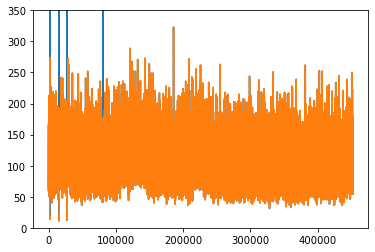

In [306]:
import matplotlib.pyplot as plt
lightcountall_np = countall_np[:,1]
lightcountall_npnan=lightcountall_np*1
lightcountall_npnan[np.where(lightcountall_np>350)]=np.nan
plt.plot(lightcountall_np)
plt.plot(lightcountall_npnan)
plt.ylim(0,350)

(0.0, 350.0)

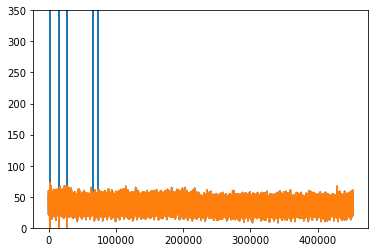

In [307]:
import matplotlib.pyplot as plt
penecountall_np = countall_np[:,3]
penecountall_npnan=penecountall_np*1
penecountall_npnan[np.where(penecountall_np>350)]=np.nan
plt.plot(penecountall_np)
plt.plot(penecountall_npnan)
plt.ylim(0,350)

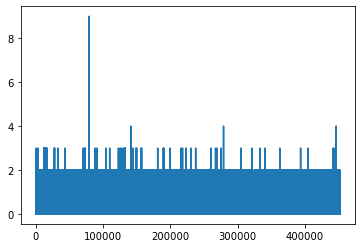

In [308]:
import matplotlib.pyplot as plt
heavycountall_np = countall_np[:,2]
#lightcountall_npnan=lightcountall_np*1
#lightcountall_npnan[np.where(lightcountall_np>350)]=np.nan
plt.plot(heavycountall_np)
#plt.plot(lightcountall_npnan)
#plt.ylim(0,350)

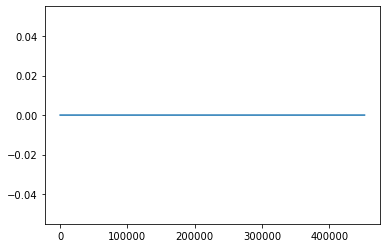

In [309]:
import matplotlib.pyplot as plt
#flagall_npnan=flagall_np*1
#lightcountall_npnan[np.where(lightcountall_np>350)]=np.nan
plt.plot(flagall_np)
#plt.plot(flagall_npnan)
#plt.ylim(0,350)

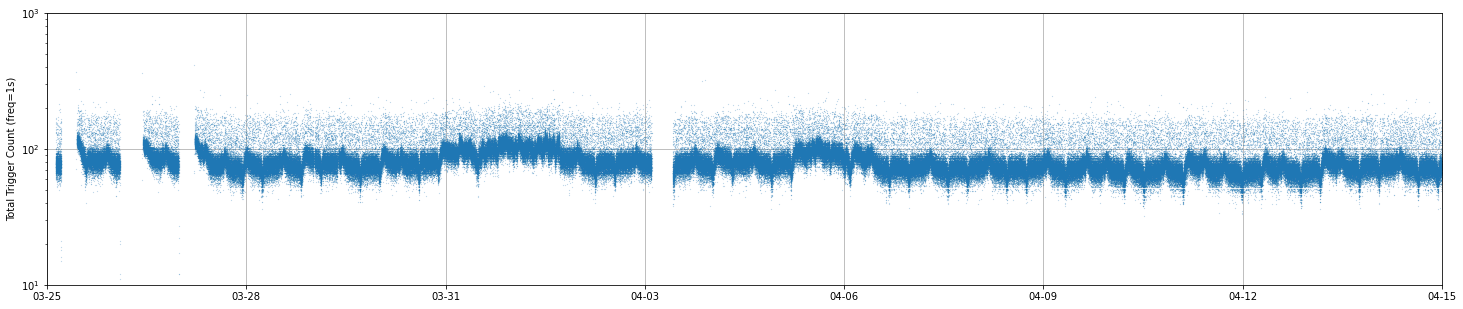

In [335]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import pandas as pd
#a = [dt.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in timesall_st] 
fig, ax=plt.subplots(figsize=(25,5))

totalcountall_pd= pd.DataFrame(data=totalcountall_np, index=timesall_st, columns=["TC"])

totalcountall_pd_1s= totalcountall_pd.resample("1s").sum()#.bfill()
totalcountall_pd_1s["TC"].replace(0, np.nan,inplace=True)
#totalcountall_pd_1s["TC"].bfill(inplace=True)
#print(totalcountall_pd_1s)
totalcountall_pd_1h= totalcountall_pd_1s.resample("1H").sum()
totalcountall_pd_1h["TC"].replace(0, np.nan,inplace=True)
totalcountall_pd_1m= totalcountall_pd_1s.resample("1T").sum()
totalcountall_pd_1m["TC"].replace(0, np.nan,inplace=True)

totalcountall_pd_21h= totalcountall_pd_1s.resample("10T").sum()
totalcountall_pd_21h["TC"].replace(0, np.nan,inplace=True)

#size=count[:,0,0].size
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
ax.plot(totalcountall_pd_1s, 'o',linestyle=None, markersize=.1 )

# time_start=dt.datetime.strptime('3/29/2022 00:00:00')
# time_proid=dt.timedelta(days=22)
# time_end  =time_start+time_proid

#ax.set_xlim(time_start, time_end)
xticks=pd.date_range('3/25/2022 00:00:00',  '4/15/2022 00:00:00', freq='3d')
ax.set_xticks(xticks)
ax.set_xlim(xticks[0], xticks[-1])

ax.set_ylabel("Total Trigger Count (freq=1s)")
ax.set_ylim(10,1000)
ax.set_yscale('log')
plt.grid()
plt.show()


-43 -21
-64 -42
-85 -63
-106 -84
-127 -105
-148 -126
-169 -147
-190 -168
-211 -189


d:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


                           TC
2022-04-07 11:00:00  66282.50
2022-04-08 08:00:00  67128.00
2022-04-09 05:00:00  66967.00
2022-04-10 02:00:00  65357.50
2022-04-10 23:00:00  63475.75
2022-04-11 20:00:00  64349.75
2022-04-12 17:00:00  63059.00
2022-04-13 14:00:00  67167.75
2022-04-14 11:00:00  69743.50
2022-04-15 08:00:00  69117.25
2022-04-16 05:00:00  68961.75 [66509.97727273 65731.475      63592.275      62791.475
 65490.3        68479.3        68070.7        67923.
 68265.75       67552.875      68014.375      68364.55
 71105.975      70346.475      69960.3        69717.7
 71028.45       73813.975      73665.925      71422.075
 68104.25      ]


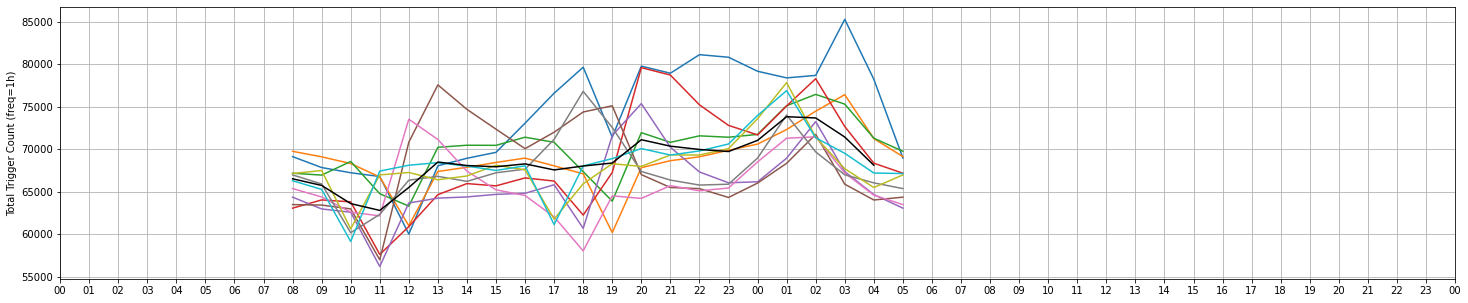

In [17]:
fig, ax=plt.subplots(figsize=(25,5))
t_end=totalcountall_pd_1h.index[-1]
t_proid=dt.timedelta(hours=21*1)
t_start  =t_end-t_proid

ax.plot(totalcountall_pd_1h.index[-22:], totalcountall_pd_1h["TC"][-22:] )
for i in range(1,10):
    print(-22-21*(i), -21*i)
    ax.plot(totalcountall_pd_1h.index[-22:], totalcountall_pd_1h["TC"][-22-21*(i):-21*i] )

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H')) 

T=21
backgroud=np.zeros((T))
for i in range(T):
    backgroud[i]=np.mean(totalcountall_pd_1h[-1-21*10+i::21])
    

print(totalcountall_pd_1h[-1-21*10::21],backgroud)
ax.plot(totalcountall_pd_1h.index[-22:-1],backgroud, 'k')
ax.set_xlim(t_start, t_end)
xticks=pd.date_range('4/15/2022 00:00:00',   '4/17/2022 00:00:00', freq='1h')
ax.set_xticks(xticks)

ax.set_ylabel("Total Trigger Count (freq=1h)")
#ax.set_yscale('log')
plt.grid()
plt.show()

In [340]:
from sunpy.coordinates.ephemeris import get_body_heliographic_stonyhurst
mars = get_body_heliographic_stonyhurst('mars', '2022-04-01 11:11:27.796000')
print(mars.radius*149597871)
mars.cartesian

from sunpy.coordinates.transformations import hgs_to_hgc, hgs_to_hcc, hgs_to_hci
from sunpy.coordinates import HeliographicStonyhurst, HeliographicCarrington, Helioprojective, Heliocentric

print(mars.cartesian*149597871)

print(hgs_to_hci(mars, Helioprojective(obstime="2022-04-01 11:11:27.796000")).cartesian*149597871)

from astropy.coordinates import SkyCoord
from sunpy.coordinates import GeocentricEarthEquatorial
SkyCoord("earth").transform_to(GeocentricEarthEquatorial(obstime="2022-04-01 11:11:27.796000")).cartesian


213241446.1105256 AU
(-15622535.72121804, 2.12525397e+08, 7797837.30225941) AU
(-1.84506172e+08, -1.06623546e+08, 7797837.30225941) AU


ValueError: Cannot parse first argument data "earth" for attribute ra

TC   2022-04-13 18:09:00
dtype: datetime64[ns] TC   2022-04-14 15:18:00
dtype: datetime64[ns] TC   0 days 21:09:00
dtype: timedelta64[ns] TC   2022-04-15 12:37:00
dtype: datetime64[ns] TC   0 days 21:19:00
dtype: timedelta64[ns]


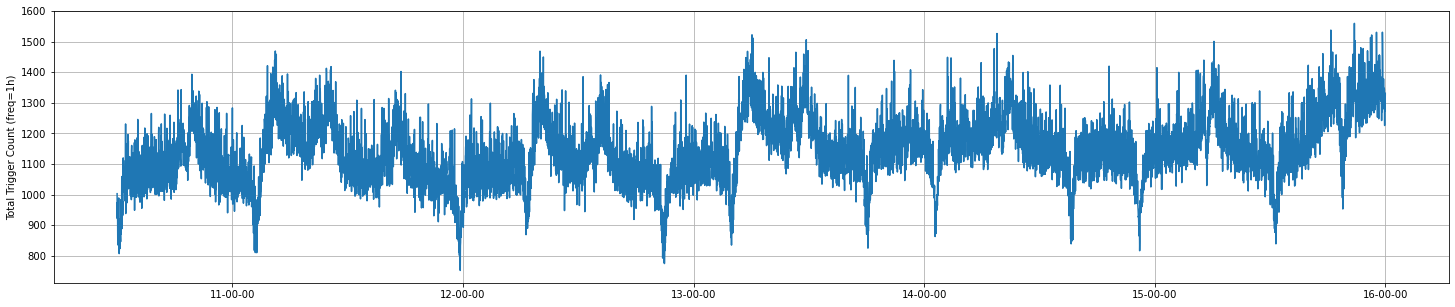

In [18]:
fig, ax=plt.subplots(figsize=(25,5))

st=450*60
ax.plot(totalcountall_pd_1m["2022-04-10 12:00:00":"2022-04-16 00:00:00"] )
t1=totalcountall_pd_1m["2022-04-13 12:00:00":"2022-04-14 00:00:00"].idxmin()
t2=totalcountall_pd_1m["2022-04-14 12:00:00":"2022-04-14 16:00:00"].idxmin()
t3=totalcountall_pd_1m["2022-04-15 12:00:00":"2022-04-15 16:00:00"].idxmin()
print (t1,t2,t2-t1, t3, t3-t2)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%H-%M')) 
#ax.set_xlim(t_start, t_end)
xticks=pd.date_range('4/13/2022 00:00:00',   '4/16/2022 00:00:00', freq='3h')
#ax.set_xticks(xticks)

ax.set_ylabel("Total Trigger Count (freq=1h)")
#ax.set_yscale('log')
plt.grid()
plt.show()

                           TC
2022-03-25 03:00:00  63260.00
2022-03-25 04:00:00  71981.75
2022-03-25 05:00:00  64784.50
2022-03-25 06:00:00  63900.00
2022-03-25 07:00:00  63900.00
...                       ...
2022-04-16 01:00:00  78378.50
2022-04-16 02:00:00  78670.50
2022-04-16 03:00:00  85262.75
2022-04-16 04:00:00  78213.75
2022-04-16 05:00:00  68961.75

[531 rows x 1 columns]


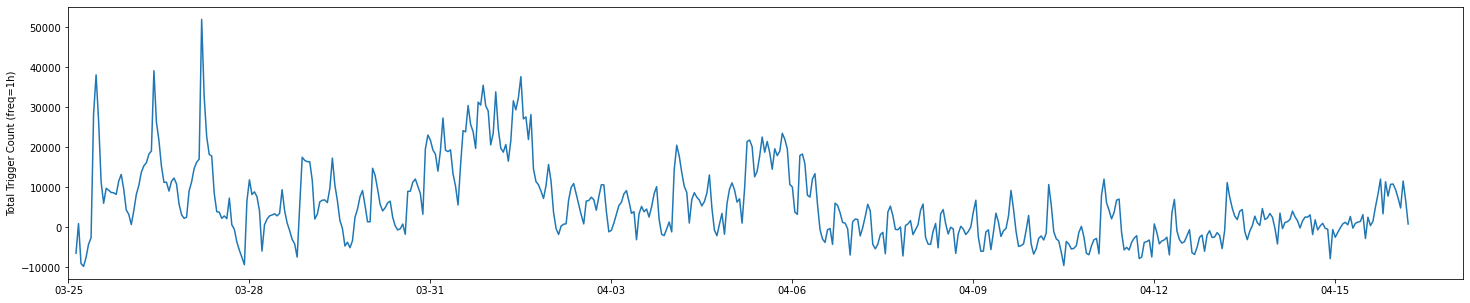

In [19]:
fig, ax=plt.subplots(figsize=(25,5))

totalcountall_bk=np.zeros(totalcountall_pd_1h.shape)
print (totalcountall_pd_1h)

for i in range(totalcountall_bk.size):
    t=totalcountall_bk.size-i-1
    b=backgroud.size-i%21-1
    totalcountall_bk[t]=totalcountall_pd_1h.values[t]-backgroud[b]

#size=count[:,0,0].size
#totalcountall_bk[np.where(totalcountall_bk<=0)]=np.nan
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
ax.plot(totalcountall_pd_1h.index, totalcountall_bk )

time_start=totalcountall_pd_1h.index[0]
time_proid=dt.timedelta(days=23)
time_end  =time_start+time_proid

ax.set_xlim(time_start, time_end)
xticks=pd.date_range('3/25/2022 00:00:00',   '4/16/2022 00:00:00', freq='3d')
ax.set_xticks(xticks)

ax.set_ylabel("Total Trigger Count (freq=1h)")
#ax.set_yscale('log')
plt.show()

[3.94209490e+07 1.82915831e+06 4.10113183e+05 5.30860708e+05
 1.23062313e+06 9.90709409e+05 3.77226949e+05 2.95595449e+05
 4.43980652e+05 6.56037523e+05 2.28982286e+05 3.45864967e+05
 1.65194675e+05 1.87437011e+05 2.38805824e+05 2.80859316e+05
 2.74957057e+05 2.96163398e+05 1.50414514e+05 1.30305482e+05
 1.29559393e+05 8.41897346e+04 3.14748516e+05 9.96861070e+04
 2.79134501e+05 6.38997971e+05 3.58520851e+05 1.63410342e+05
 4.46513205e+05 3.22043430e+05 1.87991706e+05 8.88191866e+04
 1.66555857e+05 1.11235574e+05 1.85637971e+05 1.60717489e+05
 8.38065276e+04 9.70327503e+04 2.32754441e+05 1.53232010e+05
 1.66934300e+05 1.80616603e+05 2.79121523e+04 1.88608990e+05
 8.91986672e+04 1.63176020e+05 1.12723859e+05 1.19185571e+05
 9.27290535e+04 1.09792765e+05 6.05777778e+05 1.32062356e+05
 8.63288476e+04 2.39915822e+05 1.54366863e+05 1.14546821e+05
 5.20848226e+04 1.20353772e+05 4.91419411e+04 7.52764625e+04
 8.45993506e+04 1.72251599e+05 1.33442993e+05 7.76045146e+04
 1.44789030e+05 6.126421

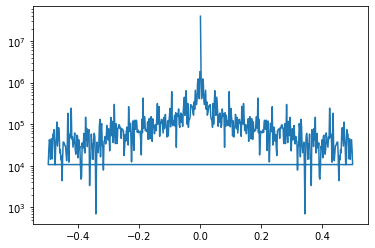

In [20]:
import scipy.fftpack as fft
fft_y= np.abs(fft.fft(totalcountall_pd_1h["TC"].values))
freq = np.fft.fftfreq(totalcountall_pd_1h["TC"].shape[-1])
print (fft_y)
plt.plot(freq, fft_y)
plt.yscale("log")


In [21]:
# 功能：把函数进行傅里叶变换，变换到频域，以期获得函数的周期
# 输入：时间序列，获取频率点数值n（可选），频率对应幅度的下限值fmin（可选）
# 输入序列的X轴需要归一化为1
# 输出： n个序列的下标以及对应的幅度值
# 创建时间： 2021-1-26

import pandas as pd
import numpy as np
import math
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
import seaborn
import scipy.signal as signal


def fftTransfer(timeseries, n=10, fmin=0.2):
    yf = abs(fft(timeseries))  # 取绝对值
    yfnormlize = yf / len(timeseries)  # 归一化处理
    yfhalf = yfnormlize[range(int(len(timeseries) / 2))]  # 由于对称性，只取一半区间
    yfhalf = yfhalf * 2   # y 归一化

    xf = np.arange(len(timeseries))  # 频率
    xhalf = xf[range(int(len(timeseries) / 2))]  # 取一半区间


    plt.subplot(211)
    x = np.arange(len(timeseries))  # x轴
    plt.plot(x, timeseries)
    plt.title('Original wave')

    plt.subplot(212)
    plt.plot(xhalf, yfhalf, 'r')
    plt.title('FFT of Mixed wave(half side frequency range)', fontsize=10, color='#7A378B')  # 注意这里的颜色可以查询颜色代码表

    fwbest = yfhalf[signal.argrelextrema(yfhalf, np.greater)]
    xwbest = signal.argrelextrema(yfhalf, np.greater)
    plt.plot(xwbest[0][:n], fwbest[:n], 'o', c='yellow')
    plt.show(block=False)
    plt.show()

    xorder = np.argsort(-fwbest)  # 对获取到的极值进行降序排序，也就是频率越接近，越排前
    print('xorder = ', xorder)
    print(type(xorder))
    xworder = list()
    xworder.append(xwbest[x] for x in xorder)  # 返回频率从大到小的极值顺序
    fworder = list()
    fworder.append(fwbest[x] for x in xorder)  # 返回幅度

    if len(fwbest) <= n:
        fwbest = fwbest[fwbest >= fmin].copy()
        return len(timeseries)/xwbest[0][:len(fwbest)], fwbest    #转化为周期输出
    else:
        fwbest = fwbest[fwbest >= fmin].copy()
        print(len(fwbest))
        print(xwbest)
        return len(timeseries)/xwbest[0][:len(fwbest)], fwbest  # 只返回前n个数   #转化为周期输出


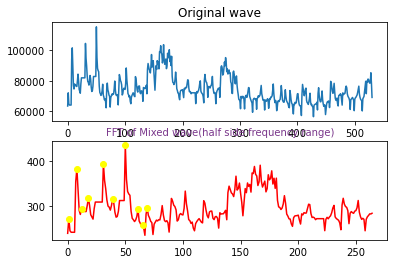

xorder =  [ 6  4 33 32  1 36 31 35 26 38 37 34 29 27 30 25 28 16 39  3 47 14  5 49
 19 43 46 12  9  2  7 24 20 48 42 22 15 23 51 41 40 21 44 45 50 18  0 11
 10 13 17  8]
<class 'numpy.ndarray'>
52
(array([  1,   8,  12,  18,  31,  39,  50,  61,  65,  69,  77,  79,  82,
        86,  90,  98, 102, 108, 114, 118, 125, 129, 132, 134, 137, 140,
       146, 149, 154, 156, 158, 160, 162, 167, 171, 174, 177, 179, 181,
       188, 200, 203, 205, 209, 213, 225, 231, 239, 246, 252, 256, 262],
      dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))



In [22]:
a,b=fftTransfer(totalcountall_pd_1h.values)
print ('')

                        TC
2022-03-25 03:06:46  16.50
2022-03-25 03:06:47  18.50
2022-03-25 03:06:48  18.50
2022-03-25 03:06:49  18.50
2022-03-25 03:06:50  18.50
...                    ...
2022-04-16 05:54:10  20.25
2022-04-16 05:54:11  17.50
2022-04-16 05:54:12  17.50
2022-04-16 05:54:13  17.50
2022-04-16 05:54:14  17.50

[1910849 rows x 1 columns]


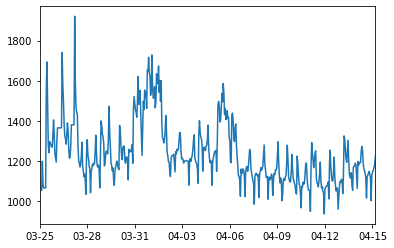

In [23]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import pandas as pd
#a = [dt.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in timesall_st] 
fig, ax=plt.subplots()

lightcountall_pd= pd.DataFrame(data=lightcountall_npnan, index=timesall_st, columns=["TC"])

lightcountall_pd_1s= lightcountall_pd.resample("1s").sum()/4.#.bfill()
lightcountall_pd_1s["TC"].replace(0, np.nan,inplace=True)
lightcountall_pd_1s["TC"].bfill(inplace=True)
print(lightcountall_pd_1s)
lightcountall_pd_1h= lightcountall_pd_1s.resample("1H").sum()
lightcountall_pd_1h["TC"].replace(0, np.nan,inplace=True)

#size=count[:,0,0].size
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
ax.plot(lightcountall_pd_1h.index, lightcountall_pd_1h["TC"]/(60) )

time_start=lightcountall_pd.index[0]
time_proid=dt.timedelta(days=21)
time_end  =time_start+time_proid

ax.set_xlim(time_start, time_end)
xticks=pd.date_range('3/25/2022 00:00:00',   '4/15/2022 00:00:00', freq='3d')
ax.set_xticks(xticks)
plt.show()


In [24]:
size=energysall_np[:,:,0].size
dE_CsI=energysall_np[:,:,2].reshape(size)
dE2   =energysall_np[:,:,1].reshape(size)
dE1   =energysall_np[:,:,0].reshape(size)
print (lightcountall_npnan.shape,dE1[2],energysall_np[0,1,0],energysall_np[1,0,0],energysall_np.shape,energysall_np.sum(2).shape, timesall_np.shape)


(452357,) 0.213 0.237 0.213 (452357, 22, 3) (452357, 22) (452357,)


In [25]:

p_index=np.where( ((((dE2*(dE2+dE_CsI)>20) & (dE2*(dE2+dE_CsI)<=150)) | ((dE2*(dE2+dE_CsI)<=20) & (dE2>1)))) & (dE1<1))

e_index=np.where( (dE2*(dE2+dE_CsI)<=20) & (dE2<1) & (dE2>0.05))

a_index=np.where( (((dE2*(dE2+dE_CsI)>150) & (dE2*(dE2+dE_CsI)<=1200)) | ((dE2*(dE2+dE_CsI)<=150) & (dE1>=1))))
H_index=np.where( dE2*(dE2+dE_CsI) >1200 )
#print ((dE2*(dE2+dE_CsI))[2], dE2[2], dE1[2])
#print(p_index[0], e_index[0], a_index[0], H_index[0], dE1.shape)
print(p_index[0].shape, e_index[0].shape, a_index[0].shape, H_index[0].shape, dE1.shape)


(677034,) (8697445,) (28660,) (131,) (9951854,)


(150, 3024)


C:\Users\25071\AppData\Local\Temp\ipykernel_3700\1104963194.py:27: RuntimeWarning: divide by zero encountered in log10
  pm=ax.pcolormesh(xedges, yedges, np.log10( Hp), cmap='rainbow')


(1, 150)

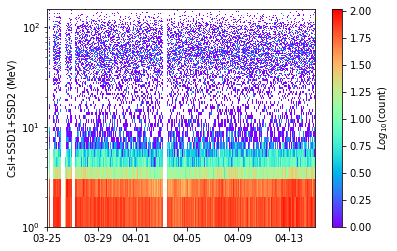

In [189]:

from ctypes import sizeof

start_time='2022-3-25 00:00:00'
end_time='2022-4-15 00:00:00'
delta=10
delta_time= "%iT"%(delta)
yedges=np.arange(0,151,1)
xedges=pd.date_range(start_time,   end_time, freq=delta_time)
# Energy_pd = pd.DataFrame(data=energysall_np.sum(2)[:,0], index=timesall_st)
# for i in range(21):
#     Energy_pd_tem= pd.DataFrame(data=energysall_np.sum(2)[:,i+1], index=timesall_st)
#     Energy_pd = pd.concat([Energy_pd,Energy_pd_tem])
# print (Energy_pd)
timesall_num22=( np.repeat(np.array(timesall_num).reshape(np.array(timesall_num).size,1),22, axis=1)).T.reshape(np.array(timesall_num).size*22)
#print(timesall_num22.shape, timesall_num22[0:22])
st_num=time.mktime(time.strptime(start_time,"%Y-%m-%d %H:%M:%S"))
et_num=time.mktime(time.strptime(end_time,"%Y-%m-%d %H:%M:%S"))
xedges1=np.arange(st_num, et_num+1, delta*60)
Hp, xedges1, yedges = np.histogram2d(timesall_num22[p_index], (dE_CsI+dE2+dE1)[p_index], bins=(xedges1,yedges))
Hp=Hp.T
yedges2=np.arange(0,2.1,0.1)
He, xedges1, yedges2 = np.histogram2d(timesall_num22[e_index], (dE_CsI+dE2+dE1)[e_index], bins=(xedges1,yedges2))
He=He.T
print (Hp.shape)
fig,ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
pm=ax.pcolormesh(xedges, yedges, np.log10( Hp), cmap='rainbow')
cb=fig.colorbar(pm)
cb.set_label(r'$Log_{10}$(count)')
#ax.set_xlabel("CsI+SSD1+SSD2 (MeV)")
ax.set_ylabel("CsI+SSD1+SSD2 (MeV)")
ax.set_yscale("log")
ax.set_ylim((1,150))

C:\Users\25071\AppData\Local\Temp\ipykernel_3700\4020952624.py:3: RuntimeWarning: divide by zero encountered in log10
  pm=ax.pcolormesh(xedges, yedges2, np.log10( He), cmap='rainbow')


(0.1, 2)

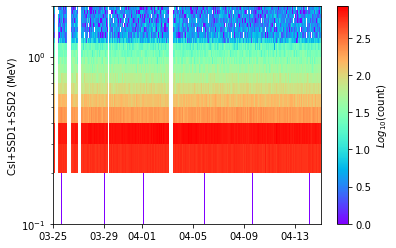

In [166]:
fig,ax = plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
pm=ax.pcolormesh(xedges, yedges2, np.log10( He), cmap='rainbow')
cb=fig.colorbar(pm)
cb.set_label(r'$Log_{10}$(count)')
#ax.set_xlabel("CsI+SSD1+SSD2 (MeV)")
ax.set_ylabel("CsI+SSD1+SSD2 (MeV)")
ax.set_yscale("log")
ax.set_ylim((0.1,2))

(array([  19,   20,   21, ..., 3021, 3022, 3023], dtype=int64),)
(array([  19,   20,   21, ..., 3021, 3022, 3023], dtype=int64),)


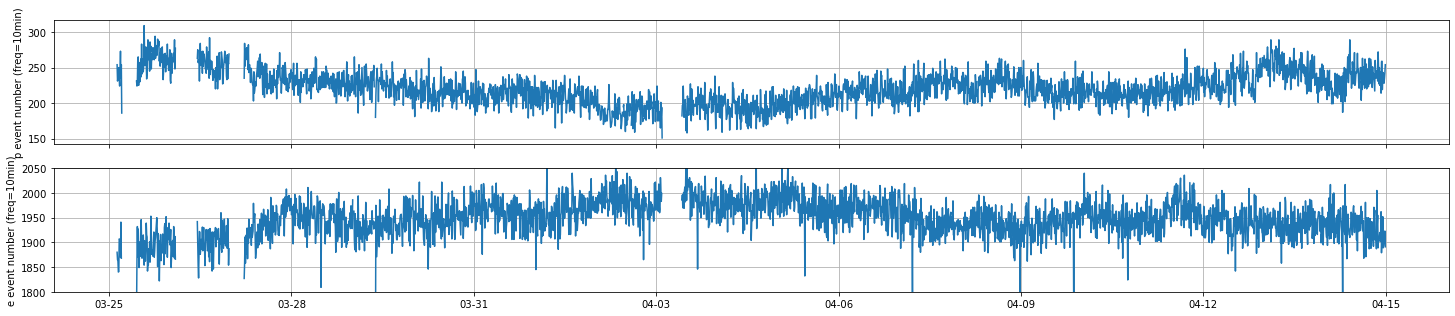

In [204]:
fig,ax = plt.subplots(2,1,figsize=(25,5),sharex=True)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
#ax.hist( H[4,:], bins=xedges)
#Hp[np.where(Hp==0)]=np.nan
#print(Hp.sum(0))
normalindex=np.where(Hp[1,:]>40)
otherindex=np.where(Hp[1,:]<=40)
print(normalindex)
Hp_plot=1*Hp
for i in otherindex:
    Hp_plot[:,i]=np.nan 
ax[0].plot(xedges[:-1],Hp_plot.sum(axis=0))

#ax.plot(xedges[normalindex],He.sum(axis=0)[normalindex])
#ax.plot(xedges[normalindex],np.array([Hp[1,i] for i in normalindex]).T)
normalindex=np.where(He[2,:]>450)
otherindex=np.where(He[2,:]<=450)
print(normalindex)
He_plot=1*He
for i in otherindex:
    He_plot[:,i]=np.nan 
ax[1].plot(xedges[:-1],He_plot.sum(axis=0))

xticks=pd.date_range('3/25/2022 00:00:00',   '4/16/2022 00:00:00', freq='3d')
ax[1].set_xticks(xticks)
ax[0].set_ylabel("p event number (freq=10min)")
ax[1].set_ylabel("e event number (freq=10min)")
ax[1].set_ylim(1800,2050)
ax[0].grid()
ax[1].grid()
plt.show()

(array([  19,   20,   21, ..., 3021, 3022, 3023], dtype=int64),)


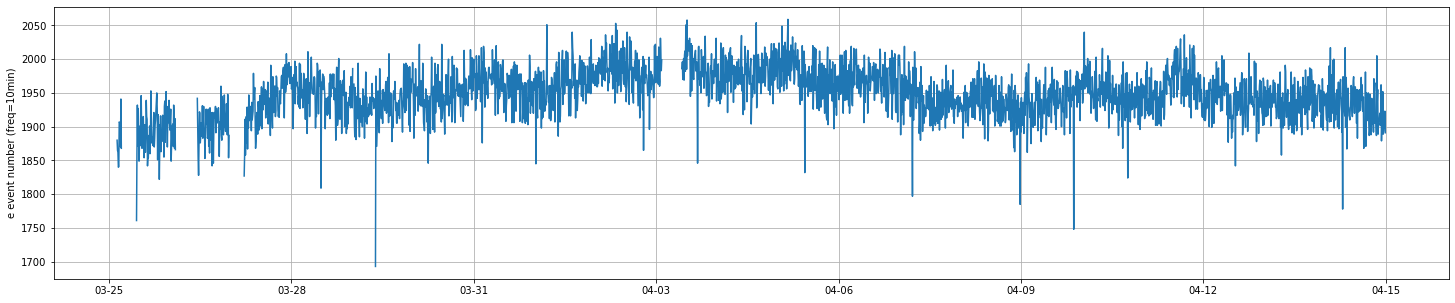

In [196]:
fig,ax = plt.subplots(figsize=(25,5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
#ax.hist( H[4,:], bins=xedges)
#Hp[np.where(Hp==0)]=np.nan
#print(Hp.sum(0))
normalindex=np.where(He[2,:]>450)
otherindex=np.where(He[2,:]<=450)
print(normalindex)
He_plot=1*He
for i in otherindex:
    He_plot[:,i]=np.nan 
ax.plot(xedges[:-1],He_plot.sum(axis=0))
#ax.plot(xedges[normalindex],He.sum(axis=0)[normalindex])
#ax.plot(xedges[normalindex],np.array([He[2,i] for i in normalindex]).T)
xticks=pd.date_range('3/25/2022 00:00:00',   '4/16/2022 00:00:00', freq='3d')
ax.set_xticks(xticks)
ax.set_ylabel("e event number (freq=10min)")
plt.grid()
plt.show()

C:\Users\25071\AppData\Local\Temp\ipykernel_3700\1763124062.py:6: RuntimeWarning: divide by zero encountered in log10
  pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')


Text(0, 0.5, 'SSD2*(CsI+SSD2) (MeV*MeV)')

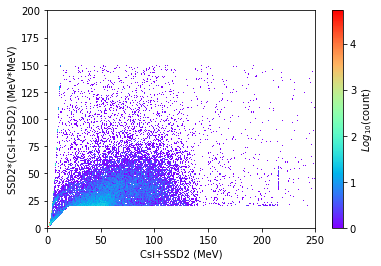

In [256]:
yedges=np.arange(0,200.1,1)
xedges=np.arange(0,250.1,0.1)
H, xedges, yedges = np.histogram2d((dE_CsI+dE2)[p_index], (dE2*(dE_CsI+dE2))[p_index], bins=(xedges,yedges))
H=H.T
fig,ax = plt.subplots()
pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')
cb=fig.colorbar(pm)
cb.set_label(r'$Log_{10}$(count)')
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("CsI+SSD2 (MeV)")
ax.set_ylabel("SSD2*(CsI+SSD2) (MeV*MeV)")

C:\Users\25071\AppData\Local\Temp\ipykernel_3700\4219824146.py:6: RuntimeWarning: divide by zero encountered in log10
  pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')


Text(0, 0.5, 'SSD2*(CsI+SSD2) (MeV*MeV)')

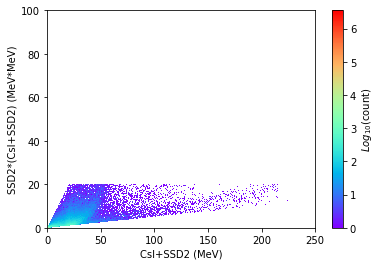

In [206]:
yedges=np.arange(0,100.1,0.1)
xedges=np.arange(0,250.1,0.1)
H, xedges, yedges = np.histogram2d((dE_CsI+dE2)[e_index], (dE2*(dE_CsI+dE2))[e_index], bins=(xedges,yedges))
H=H.T
fig,ax = plt.subplots()
pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')
cb=fig.colorbar(pm)
cb.set_label(r'$Log_{10}$(count)')
ax.set_xlabel("CsI+SSD2 (MeV)")
ax.set_ylabel("SSD2*(CsI+SSD2) (MeV*MeV)")

C:\Users\25071\AppData\Local\Temp\ipykernel_3700\3090941851.py:6: RuntimeWarning: divide by zero encountered in log10
  pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='Blues')
C:\Users\25071\AppData\Local\Temp\ipykernel_3700\3090941851.py:9: RuntimeWarning: divide by zero encountered in log10
  pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='Oranges')
C:\Users\25071\AppData\Local\Temp\ipykernel_3700\3090941851.py:12: RuntimeWarning: divide by zero encountered in log10
  pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='Greens')


Text(0, 0.5, 'SSD1*(CsI+SSD1+SSD2) (MeV*MeV)')

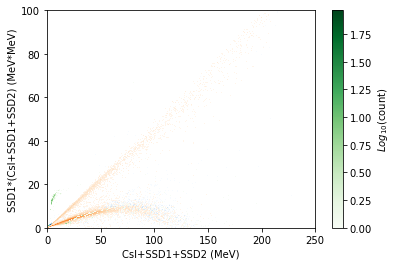

In [33]:
yedges=np.arange(0,100.1,0.1)
xedges=np.arange(0,250.1,0.1)
fig,ax = plt.subplots()
H, xedges, yedges = np.histogram2d((dE_CsI+dE2+dE1)[p_index], (dE1*(dE_CsI+dE2+dE1))[p_index], bins=(xedges,yedges))
H=H.T
pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='Blues')
H, xedges, yedges = np.histogram2d((dE_CsI+dE2+dE1)[e_index], (dE1*(dE_CsI+dE2+dE1))[e_index], bins=(xedges,yedges))
H=H.T
pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='Oranges')
H, xedges, yedges = np.histogram2d((dE_CsI+dE2+dE1)[a_index], (dE1*(dE_CsI+dE2+dE1))[a_index], bins=(xedges,yedges))
H=H.T
pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='Greens')
cb=fig.colorbar(pm)
cb.set_label(r'$Log_{10}$(count)')
ax.set_xlabel("CsI+SSD1+SSD2 (MeV)")
ax.set_ylabel("SSD1*(CsI+SSD1+SSD2) (MeV*MeV)")

C:\Users\25071\AppData\Local\Temp\ipykernel_3700\3966740553.py:6: RuntimeWarning: divide by zero encountered in log10
  pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')


Text(0, 0.5, 'SSD1*(CsI+SSD1+SSD2) (MeV*MeV)')

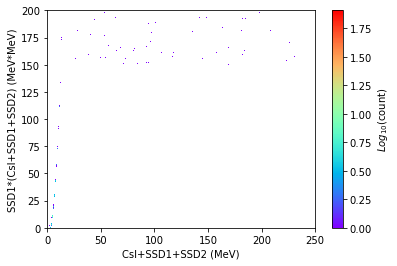

In [127]:
yedges=np.arange(0,200.1,0.1)
xedges=np.arange(0,250.1,0.1)
H, xedges, yedges = np.histogram2d((dE_CsI+dE2+dE1)[a_index], (dE2*(dE_CsI+dE2+dE1))[a_index], bins=(xedges,yedges))
H=H.T
fig,ax = plt.subplots()
pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')
cb=fig.colorbar(pm)
cb.set_label(r'$Log_{10}$(count)')
ax.set_xlabel("CsI+SSD1+SSD2 (MeV)")
ax.set_ylabel("SSD1*(CsI+SSD1+SSD2) (MeV*MeV)")

C:\Users\25071\AppData\Local\Temp\ipykernel_3700\2234769726.py:6: RuntimeWarning: divide by zero encountered in log10
  ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')


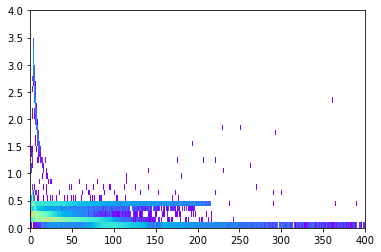

In [35]:
yedges=np.arange(0,4.1,0.1)
xedges=np.arange(0,400.1,0.1)
H, xedges, yedges = np.histogram2d(dE_CsI+dE2+dE1, dE1, bins=(xedges,yedges))
H=H.T
fig,ax = plt.subplots()
ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')

C:\Users\25071\AppData\Local\Temp\ipykernel_3700\2500860115.py:6: RuntimeWarning: divide by zero encountered in log10
  pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')


Text(0, 0.5, 'SSD1 (MeV)')

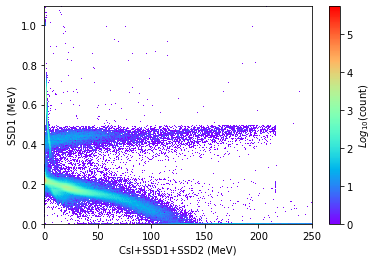

In [36]:
yedges=np.arange(0,1.1,0.005)
xedges=np.arange(0,250.1,0.1)
H, xedges, yedges = np.histogram2d(dE_CsI+dE2+dE1, dE1, bins=(xedges,yedges))
H=H.T
fig,ax = plt.subplots()
pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')
cb=fig.colorbar(pm)
cb.set_label(r'$Log_{10}$(count)')
ax.set_xlabel("CsI+SSD1+SSD2 (MeV)")
ax.set_ylabel("SSD1 (MeV)")

C:\Users\25071\AppData\Local\Temp\ipykernel_3700\4059554789.py:6: RuntimeWarning: divide by zero encountered in log10
  pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')


Text(0, 0.5, 'SSD1*(CsI+SSD1+SSD2) (MeV*MeV)')

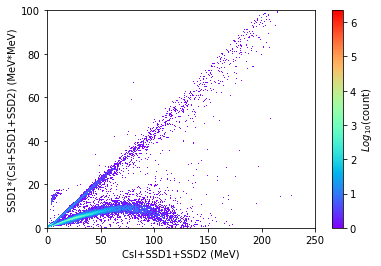

In [37]:
yedges=np.arange(0,100.1,0.1)
xedges=np.arange(0,250.1,0.1)
H, xedges, yedges = np.histogram2d(dE_CsI+dE2+dE1, dE1*(dE_CsI+dE2+dE1), bins=(xedges,yedges))
H=H.T
fig,ax = plt.subplots()
pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')
cb=fig.colorbar(pm)
cb.set_label(r'$Log_{10}$(count)')
ax.set_xlabel("CsI+SSD1+SSD2 (MeV)")
ax.set_ylabel("SSD1*(CsI+SSD1+SSD2) (MeV*MeV)")

C:\Users\25071\AppData\Local\Temp\ipykernel_3700\1363095932.py:6: RuntimeWarning: divide by zero encountered in log10
  pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')


Text(0, 0.5, 'SSD2*(CsI+SSD1+SSD2) (MeV*MeV)')

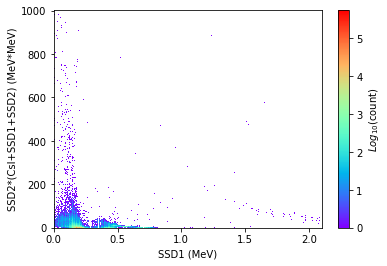

In [38]:
yedges=np.arange(0,1001.1,1)
xedges=np.arange(0,2.1,0.001)
H, xedges, yedges = np.histogram2d(dE1, dE2*(dE_CsI+dE2+dE1), bins=(xedges,yedges))
H=H.T
fig,ax = plt.subplots()
pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')
cb=fig.colorbar(pm)
cb.set_label(r'$Log_{10}$(count)')
ax.set_xlabel("SSD1 (MeV)")
ax.set_ylabel("SSD2*(CsI+SSD1+SSD2) (MeV*MeV)")

C:\Users\25071\AppData\Local\Temp\ipykernel_3700\2439129419.py:6: RuntimeWarning: divide by zero encountered in log10
  pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')


Text(0, 0.5, 'SSD1 (MeV)')

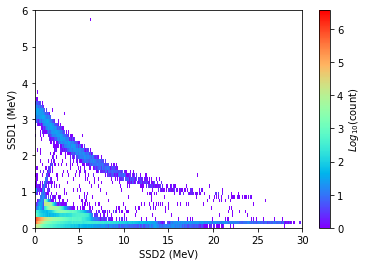

In [39]:
yedges=np.arange(0,6.1,0.1)
xedges=np.arange(0,30.1,0.1)
H, xedges, yedges = np.histogram2d(dE2, dE1, bins=(xedges,yedges))
H=H.T
fig,ax = plt.subplots()
pm=ax.pcolormesh(xedges, yedges, np.log10(H), cmap='rainbow')
cb=fig.colorbar(pm)
cb.set_label(r'$Log_{10}$(count)')
ax.set_xlabel("SSD2 (MeV)")
ax.set_ylabel("SSD1 (MeV)")

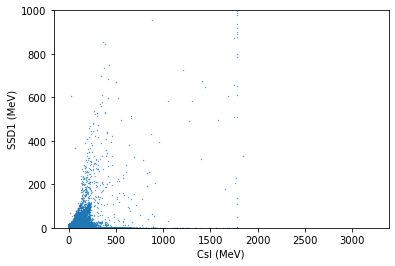

In [40]:
fig, ax=plt.subplots()
total=energysall_np[:,:,2].reshape(size)+energysall_np[:,:,1].reshape(size)+energysall_np[:,:,0].reshape(size)
ax.scatter(total, energysall_np[:,:,0].reshape(size)*total, s=0.1)
ax.set_xlabel("CsI (MeV)")
ax.set_ylabel("SSD1 (MeV)")
#ax.set_xlim(-10, 300)#
ax.set_ylim(-.1, 1000)
plt.show()